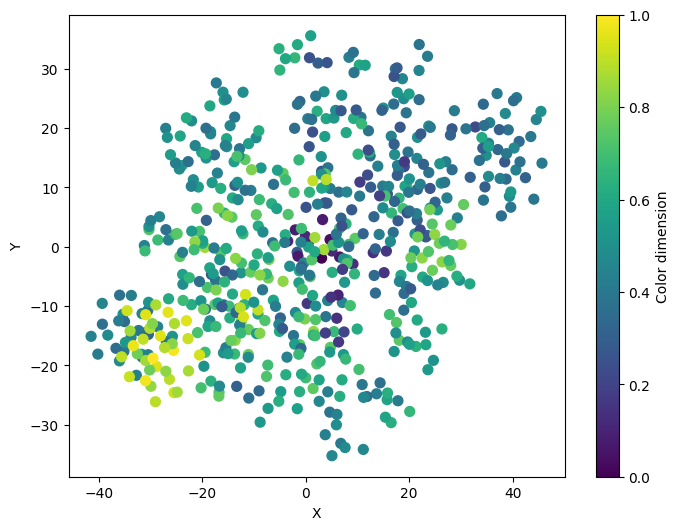

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Read the CSV file and preprocess the data
df = pd.read_csv("./sample_embeddings.csv")
df = df.drop(columns=['filename'])
df = df.dropna()

# Run t-SNE on the dataframe
tsne = TSNE(n_components=3, random_state=42)
transformed_data = tsne.fit_transform(df)

# Run PCA on the dataframe
# pca = PCA(n_components=3)
# transformed_data = pca.fit_transform(df)


# Create a new dataframe with the transformed data
df_transformed = pd.DataFrame(transformed_data, columns=['x', 'y', 'color'])

# Normalize the color column to a range of [0, 1]
df_transformed['color'] = (df_transformed['color'] - df_transformed['color'].min()) / (df_transformed['color'].max() - df_transformed['color'].min())

# Choose a colormap
cmap = plt.get_cmap("viridis")

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(df_transformed['x'], df_transformed['y'], c=df_transformed['color'], cmap=cmap, marker='o', s=50)

# Add a colorbar to the plot
cbar = plt.colorbar(sc)
cbar.set_label('Color dimension')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()

In [8]:
tsne = TSNE(n_components=5, random_state=42)
embeddings_5d = tsne.fit_transform(df)

scaler = MinMaxScaler()
rgb_normalized = scaler.fit_transform(embeddings_5d[:, 2:])

rgb_8bit = (rgb_normalized * 255).astype(np.uint8)

plt.scatter(embeddings_5d[:, 0], embeddings_5d[:, 1], c=rgb_8bit/255)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization with RGB Colors')
plt.show()

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

In [6]:
# Uses t-sne to reduce the dimensionality of the data to 5 dimensions (x, y, z, r, g, b)

tsne = TSNE(n_components=5, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.values)

# Uses pyvista to plot the results

import pyvista as pv
from pyvista import examples

# Create a pyvista plotter
plotter = pv.Plotter()

# Add the mesh
mesh = examples.download_st_helens()
plotter.add_mesh(mesh, color='tan', show_edges=True)

# Add the points
plotter.add_points(tsne_results, point_size=10, render_points_as_spheres=True)

# Render the plotter
plotter.show()

# Uses matplotlib to plot the results

# fig = plt.figure()


ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.